**Standard gates**

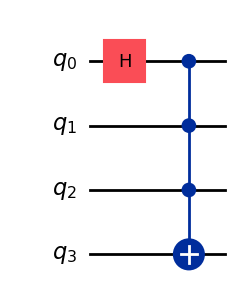

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0,1,2,3])
qc.draw('mpl')

**N-local circuits**

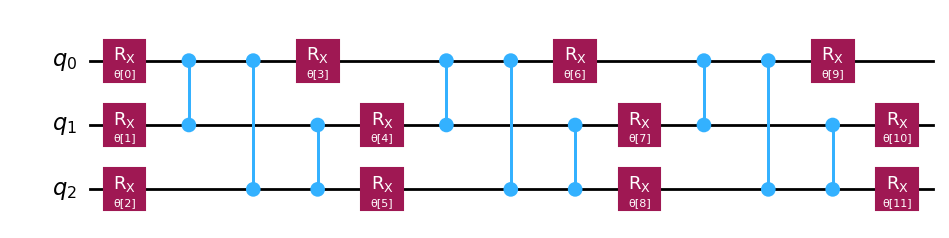

In [2]:
from qiskit.circuit.library import TwoLocal
two_local = TwoLocal(3, 'rx', 'cz')
two_local.decompose().draw('mpl')

In [19]:
two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

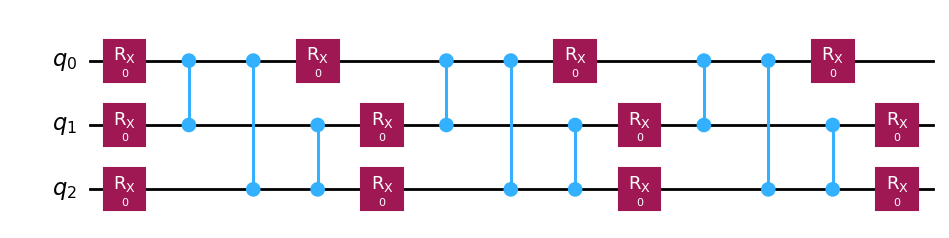

In [20]:
bound_circuit = two_local.assign_parameters({ p: 0 for p in two_local.parameters})
bound_circuit.decompose().draw('mpl')

**Data-encoding circuits**

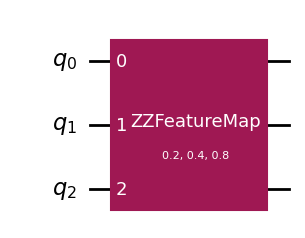

In [21]:
from qiskit.circuit.library import ZZFeatureMap
 
features = [0.2, 0.4, 0.8]
feature_map = ZZFeatureMap(feature_dimension=len(features))
 
encoded = feature_map.assign_parameters(features)
encoded.draw('mpl')

**Time-evolution circuits**

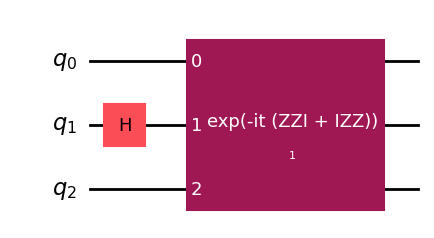

In [22]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
 
 
# Prepare an initial state with a Hamadard on the middle qubit
state = QuantumCircuit(3)
state.h(1)
 
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
evolution = PauliEvolutionGate(hamiltonian, time=1)
 
# Evolve state by appending the evolution gate
state.compose(evolution, inplace=True)
 
state.draw('mpl')

**Benchmarking and complexity-theory circuits**

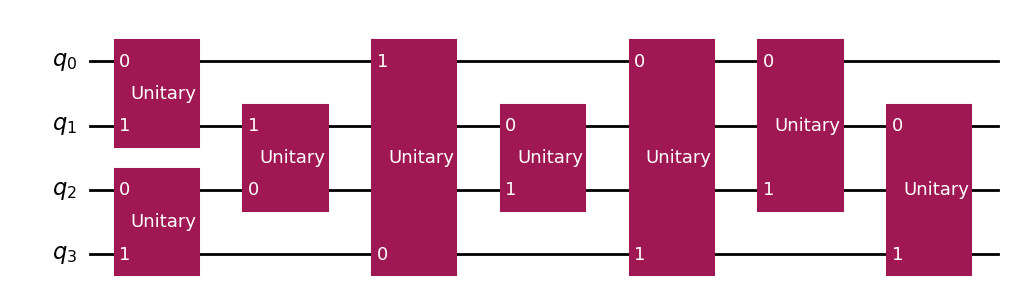

In [23]:
from qiskit.circuit.library import QuantumVolume
QuantumVolume(4).decompose().draw('mpl')

**Arithmetic circuits**

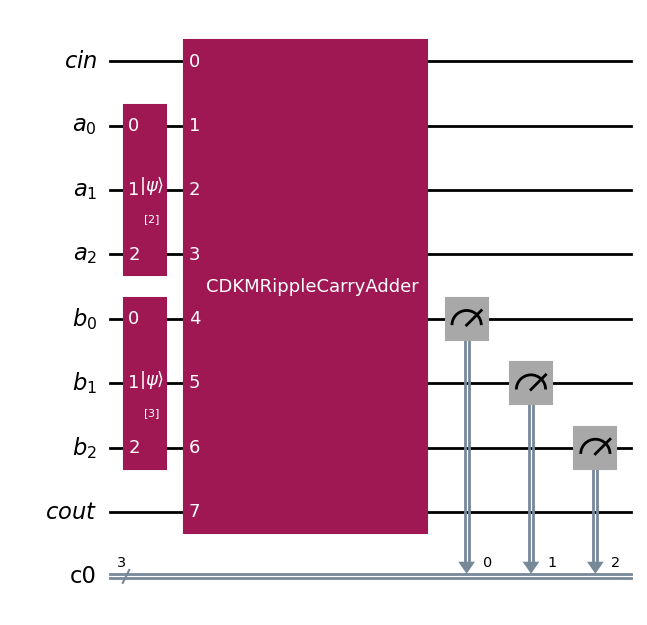

In [24]:
from qiskit.circuit.library import CDKMRippleCarryAdder
adder = CDKMRippleCarryAdder(3)  # Adder of 3-bit numbers
 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
# Create the number A=2
reg_a = QuantumRegister(3, 'a')
number_a = QuantumCircuit(reg_a)
number_a.initialize(2) # Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(3, 'b')
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 
# Create a circuit to hold everything, including a classical register for
# the result
reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*adder.qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = circuit.compose(number_a, qubits=reg_a).compose(number_b, qubits=reg_b).compose(adder)
circuit.measure(reg_b, reg_result)
circuit.draw('mpl')

In [25]:
from qiskit.primitives import Sampler
 
result = Sampler().run(circuit).result()
result.quasi_dists[0]

{5: 1.0}